In [141]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, accuracy_score, confusion_matrix, roc_auc_score, silhouette_score, mean_squared_error, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.manifold import trustworthiness
from scipy.spatial.distance import cdist

In [142]:
data = pd.read_csv('Dataset.csv')

In [143]:
data

,Index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1,718,0,2,2,2,1,17,0,12,...,62,118,9,0,77,1,7.121212,1.909091,25,0
1,2,218,0,2,2,2,1,15,0,7,...,41,41,1,1,23,0,4.545455,1.090909,2,0
2,3,4,0,1,1,1,1,3,0,3,...,0,2,0,0,1,0,2.000000,1.000000,2,0
3,4,5,0,2,2,2,1,4,0,4,...,245,279,0,0,0,0,0.000000,0.000000,0,0
4,5,19,0,1,1,1,1,9,0,4,...,2,2,0,0,1,1,1.000000,1.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,298170,100,0,1,1,1,1,8,0,4,...,13,14,0,0,10,1,1.444444,1.000000,2,0
298170,298171,16,0,2,2,2,1,15,3,12,...,3,3,0,0,2,0,6.000000,1.000000,3,0
298171,298172,111,1,1,1,1,1,6,0,4,...,29,25,0,0,13,2,1.692308,1.000000,1,0
298172,298173,98,0,1,1,1,1,4,0,3,...,39,29,0,0,15,1,1.866667,1.000000,5,0


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298174 entries, 0 to 298173
Data columns (total 83 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Index        298174 non-null  int64  
 1   FEATURE1     298174 non-null  int64  
 2   FEATURE2     298174 non-null  int64  
 3   FEATURE3     298174 non-null  int64  
 4   FEATURE4     298174 non-null  int64  
 5   FEATURE5     298174 non-null  int64  
 6   FEATURE6     298174 non-null  int64  
 7   FEATURE7     298174 non-null  int64  
 8   FEATURE8     298174 non-null  int64  
 9   FEATURE9     298174 non-null  int64  
 10  FEATURE10    298174 non-null  int64  
 11  FEATURE11    298174 non-null  int64  
 12  FEATURE12    298174 non-null  int64  
 13  FEATURE13    298174 non-null  int64  
 14  FEATURE14    298174 non-null  int64  
 15  FEATURE15    298174 non-null  int64  
 16  FEATURE16    298174 non-null  int64  
 17  FEATURE17    298174 non-null  int64  
 18  FEATURE18    298174 non-

In [145]:
data.drop(columns='Index', inplace=True)

In [146]:
# Initialize an empty DataFrame
metrics_df = pd.DataFrame(columns=["Algorithm", "Accuracy", "Confusion Matrix", "Classification Report", "AUC-ROC", "Silhouette Coefficient", "Calinski-Harabasz Index", "Davies-Bouldin Index"])

##Data Preprocessing

In [147]:
# Apply z-score normalization only to the features
data = data.apply(lambda x: zscore(x) if x.name != 'Class Label' else x)

In [148]:
data.head(5)

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636,0
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186,0
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186,0
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258,0
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222,0


## Feature Analysis

<Axes: >

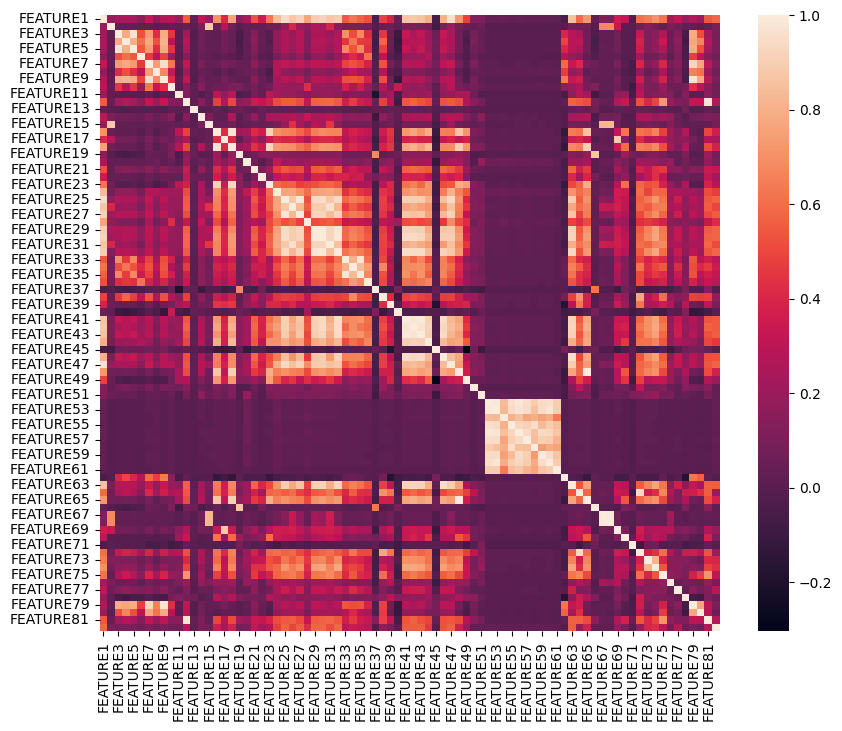

In [149]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)

## Unsupervised Learning

In [150]:
features = data.drop(columns='Class Label')
class_label = data['Class Label']

# Calculate Spearman correlation between features and the target variable
correlation_with_target = features.corrwith(class_label)
correlation_with_target

FEATURE1     0.579458
FEATURE2     0.106259
FEATURE3     0.096765
FEATURE4     0.100527
FEATURE5     0.102132
               ...   
FEATURE77    0.302372
FEATURE78    0.052914
FEATURE79    0.105361
FEATURE80    0.063604
FEATURE81    0.284718
Length: 81, dtype: float64

### Part A

In [151]:
# Create a DataFrame to store feature correlations
feature_ranking = pd.DataFrame({'Feature': features.columns, 'Correlation': correlation_with_target})

# Apply KMeans clustering with 5 clusters based on correlation values
kmeans = KMeans(n_clusters=5, random_state=42)
feature_ranking['Cluster'] = kmeans.fit_predict(feature_ranking[['Correlation']])

# Calculate the average correlation within each cluster
cluster_avg_corr = feature_ranking.groupby('Cluster')['Correlation'].mean()

# Assign ranks to the clusters based on average correlation in descending order
cluster_rank = cluster_avg_corr.rank(ascending=False).astype(int)

# Add the cluster ranks to the original DataFrame
feature_ranking['Cluster Rank'] = feature_ranking['Cluster'].map(cluster_rank)

# Sort the clusters based on average correlation in descending order
feature_ranking = feature_ranking.sort_values(by='Cluster Rank', ascending=False)

# Reset the index
feature_ranking = feature_ranking.reset_index(drop=True)

# Display the result
feature_ranking

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Feature,Correlation,Cluster,Cluster Rank
0,FEATURE78,0.052914,2,5
1,FEATURE61,0.015457,2,5
2,FEATURE60,0.028608,2,5
3,FEATURE59,0.024542,2,5
4,FEATURE58,0.028043,2,5
...,...,...,...,...
76,FEATURE27,0.554470,0,1
77,FEATURE26,0.493800,0,1
78,FEATURE25,0.570547,0,1
79,FEATURE24,0.474449,0,1


In [152]:
# Silhouette Coefficient
silhouette_avg = silhouette_score(feature_ranking[['Correlation']], feature_ranking['Cluster'])
print(f'Silhouette Coefficient: {silhouette_avg}')

Silhouette Coefficient: 0.6671166094504415


In [153]:
# Extracting the relevant columns for clustering
cluster_data = feature_ranking[['Correlation', 'Cluster']]

# Calculate Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(cluster_data['Correlation'].values.reshape(-1, 1), cluster_data['Cluster'])

print("Calinski-Harabasz Score:", calinski_harabasz)

Calinski-Harabasz Score: 792.9507170726943


In [154]:
# Calculate Davies-Bouldin score
davies_bouldin = davies_bouldin_score(cluster_data['Correlation'].values.reshape(-1, 1), cluster_data['Cluster'])

print("Davies-Bouldin Score:", davies_bouldin)

Davies-Bouldin Score: 0.42912970723931865


In [155]:
metrics_df = metrics_df.append({
    "Algorithm": "KMeans_PartA",
    "Accuracy": "_",
    "Confusion Matrix": "_",
    "Classification Report": "_",
    "AUC-ROC": "_",
    "Silhouette Coefficient": silhouette_avg,
    "Calinski-Harabasz Index": calinski_harabasz,
    "Davies-Bouldin Index": davies_bouldin
}, ignore_index=True)

<ipython-input-155-ced079e70cd1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


### Part B

In [156]:
# Step 1: Calculate Association Measure
association_scores = mutual_info_classif(data.iloc[:, :-1], data['Class Label'], discrete_features='auto')

# Step 2: Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data.iloc[:, :-2])  # Assuming the last column is the label

# Step 3: Create DataFrames for Ranking
df_cluster_0 = data[data['cluster'] == 0].drop(['Class Label', 'cluster'], axis=1)
df_cluster_1 = data[data['cluster'] == 1].drop(['Class Label', 'cluster'], axis=1)

# Step 4: Rank Features for Cluster 0
association_scores_cluster_0 = mutual_info_classif(df_cluster_0, data[data['cluster'] == 0]['Class Label'], discrete_features='auto')
ranked_features_0 = pd.DataFrame({'Feature': df_cluster_0.columns, 'Impact_on_Label_0': association_scores_cluster_0})
ranked_features_0 = ranked_features_0.sort_values(by='Impact_on_Label_0', ascending=False).reset_index(drop=True)
ranked_features_0['Rank'] = np.arange(len(ranked_features_0), 0, -1)  # Add the rank column in descending order

# Step 5: Rank Features for Cluster 1
association_scores_cluster_1 = mutual_info_classif(df_cluster_1, data[data['cluster'] == 1]['Class Label'], discrete_features='auto')
ranked_features_1 = pd.DataFrame({'Feature': df_cluster_1.columns, 'Impact_on_Label_1': association_scores_cluster_1})
ranked_features_1 = ranked_features_1.sort_values(by='Impact_on_Label_1', ascending=False).reset_index(drop=True)
ranked_features_1['Rank'] = np.arange(len(ranked_features_1), 0, -1)  # Add the rank column in descending order

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [157]:
print("Features Impact on Label 0:")
ranked_features_0

Features Impact on Label 0:


,Feature,Impact_on_Label_0,Rank
0,FEATURE21,0.033115,81
1,FEATURE36,0.029183,80
2,FEATURE11,0.026207,79
3,FEATURE4,0.019775,78
4,FEATURE3,0.019667,77
...,...,...,...
76,FEATURE74,0.001284,5
77,FEATURE25,0.001064,4
78,FEATURE77,0.000707,3
79,FEATURE47,0.000694,2


In [158]:
print("\nFeatures Impact on Label 1:")
ranked_features_1


Features Impact on Label 1:


,Feature,Impact_on_Label_1,Rank
0,FEATURE47,0.193460,81
1,FEATURE1,0.188614,80
2,FEATURE25,0.177229,79
3,FEATURE29,0.171295,78
4,FEATURE30,0.171112,77
...,...,...,...
76,FEATURE53,0.000000,5
77,FEATURE61,0.000000,4
78,FEATURE55,0.000000,3
79,FEATURE59,0.000000,2


In [159]:
# Calculate Silhouette Coefficient
silhouette_avg = silhouette_score(data.iloc[:, :-2], data['cluster'])
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.6639456029067881


In [160]:
# Combine ranked features for both clusters
ranked_features_combined = pd.merge(ranked_features_0, ranked_features_1, on='Feature')

# Calculate the sum of ranks for each feature
ranked_features_combined['Sum_of_Ranks'] = ranked_features_combined['Rank_x'] + ranked_features_combined['Rank_y']

# Sort features based on the sum of ranks in descending order
ranked_features_combined = ranked_features_combined.sort_values(by='Sum_of_Ranks', ascending=False).reset_index(drop=True)

# Select the top features for clustering
num_top_features = 5  # You can adjust this number based on your requirements
selected_features = ranked_features_combined.head(num_top_features)['Feature'].tolist()

# Select the top features from the original dataset
selected_data = data[selected_features + ['cluster']]

# Calculate Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(selected_data.iloc[:, :-1], selected_data['cluster'])

print("Calinski-Harabasz Score:", calinski_harabasz)

Calinski-Harabasz Score: 57262.676960498546


In [161]:
# Calculate Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(data.iloc[:, :-2], data['cluster'])
print("Davies-Bouldin Score:", davies_bouldin)

Davies-Bouldin Score: 1.3654882428737274


In [162]:
metrics_df = metrics_df.append({
    "Algorithm": "KMeans_PartB",
    "Accuracy": "_",
    "Confusion Matrix": "_",
    "Classification Report": "_",
    "AUC-ROC": "_",
    "Silhouette Coefficient": silhouette_avg,
    "Calinski-Harabasz Index": calinski_harabasz,
    "Davies-Bouldin Index": davies_bouldin
}, ignore_index=True)

<ipython-input-162-5e890adedb47>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


In [163]:
data.drop('cluster', axis=1, inplace=True)

### Part C

In [164]:
# Combine features and labels into a new DataFrame
df = pd.concat([features, class_label], axis=1)

# Create an instance of RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Perform undersampling
features_resampled, class_label_resampled = under_sampler.fit_resample(features, class_label)

# Check the new distribution of class labels
print(pd.Series(class_label_resampled).value_counts())

0    990
1    990
Name: Class Label, dtype: int64


In [165]:
pip install networkx

In [166]:
pip install metis

In [167]:
pip install tqdm

In [168]:
!apt-get install metis

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
metis is already the newest version (5.1.0.dfsg-7build2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [169]:
from chameleon import *

In [170]:
pca = PCA(n_components= 2)
reduced = pca.fit_transform(features_resampled)
print( "pca explained_variance_ ",pca.explained_variance_)
print( "pca explained_variance_ratio_ ",pca.explained_variance_ratio_)

pca explained_variance_  [1052.66754446  209.36362772]
pca explained_variance_ratio_  [0.54889977 0.10916994]


In [171]:
# Convert NumPy array to pandas DataFrame
reduced_1 = pd.DataFrame(reduced)

0it [00:00, ?it/s]


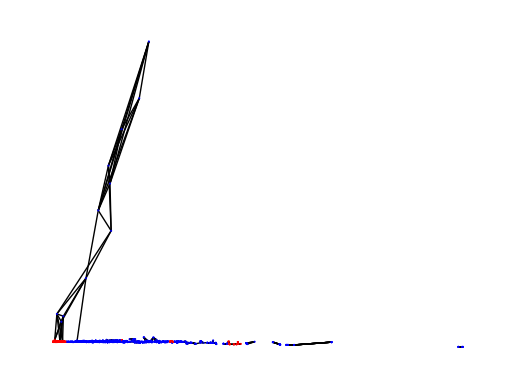

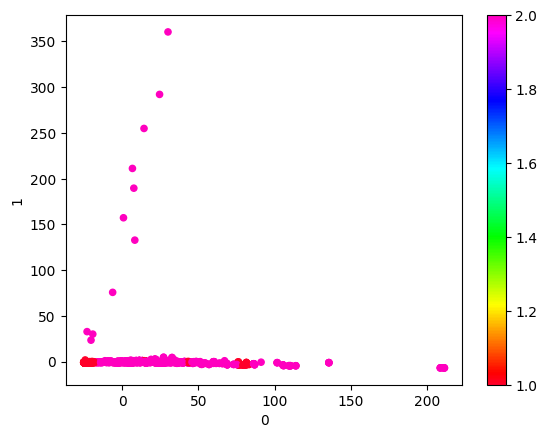

In [172]:
# plot graph and clustering result
res = cluster(reduced_1, k=2, knn=5, m=2, alpha=2.0, plot_graph=True, plot_data=True)

In [173]:
res

,0,1,cluster
0,-24.989630,-0.978261,1
1,-23.508955,-0.833394,1
2,-21.548150,-0.931830,1
3,-24.247583,-0.898134,1
4,-22.495628,-0.838634,1
...,...,...,...
1975,68.938340,-3.487615,2
1976,-9.418400,0.004393,2
1977,105.569830,-3.906780,2
1978,-12.277739,-0.268168,2


In [174]:
chameleon_data = pd.merge(data, res[['cluster']], left_index=True, right_index=True)
chameleon_data.drop('Class Label', axis=1, inplace=True)
chameleon_data.head(5)

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,cluster
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636,1
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186,1
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186,1
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258,1
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222,1


In [175]:
class_counts = chameleon_data['cluster'].value_counts()
print(class_counts)

1    992
2    988
Name: cluster, dtype: int64


In [176]:
# Assuming you have a DataFrame 'data' with features and labels
X = chameleon_data.drop('cluster', axis=1)  # Features
y = chameleon_data['cluster']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Predict on the test set using the RandomForest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the RandomForest model
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf, multi_class='ovr'))

Random Forest Model:
Accuracy: 0.48737373737373735
Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.50      0.50       203
           2       0.47      0.48      0.48       193

    accuracy                           0.49       396
   macro avg       0.49      0.49      0.49       396
weighted avg       0.49      0.49      0.49       396

Confusion Matrix:
 [[101 102]
 [101  92]]
AUC-ROC: 0.48711044181832097


In [177]:
metrics_df = metrics_df.append({
    "Algorithm": "Chameleon",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf),
    "Classification Report": classification_report(y_test, y_pred_rf),
    "AUC-ROC": roc_auc_score(y_test, y_pred_rf, multi_class='ovr'),
    "Silhouette Coefficient": "_",
    "Calinski-Harabasz Index": "_",
    "Davies-Bouldin Index": "_"
}, ignore_index=True)

<ipython-input-177-21efad328b4f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


In [178]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with features and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features based on importance in descending order
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Reset the index
sorted_features = sorted_features.reset_index(drop=True)

# Add a new column 'Rank' starting from 82 and decreasing one by one
sorted_features['Rank'] = np.arange(len(sorted_features), 0, -1)

# Print the sorted features with ranks
print("Feature Ranking (Descending Order with Ranks):")
sorted_features

Feature Ranking (Descending Order with Ranks):


,Feature,Importance,Rank
0,FEATURE71,0.035603,81
1,FEATURE73,0.032285,80
2,FEATURE47,0.031252,79
3,FEATURE40,0.030268,78
4,FEATURE1,0.029409,77
...,...,...,...
76,FEATURE60,0.000188,5
77,FEATURE56,0.000173,4
78,FEATURE57,0.000157,3
79,FEATURE59,0.000132,2


## Supervised Learning

### Imbalanced Dataset Management

In [179]:
class_counts = data['Class Label'].value_counts()
print(class_counts)

0    297184
1       990
Name: Class Label, dtype: int64


<ipython-input-180-c264c35f3588>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=['blue', 'red'])


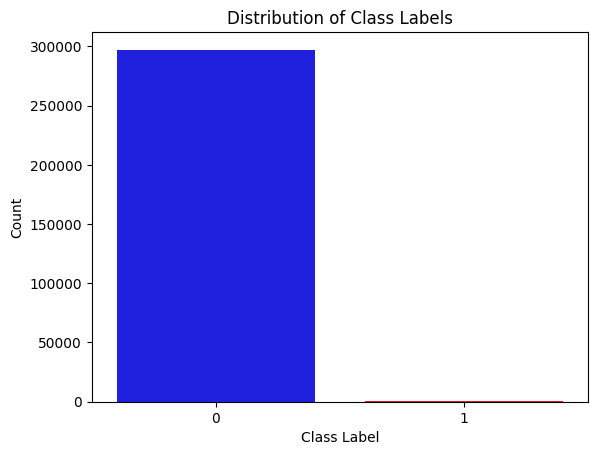

In [180]:
# Plotting a bar chart using seaborn
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['blue', 'red'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()

### Random Forest Model

In [181]:
# Assuming you have a DataFrame 'data' with features and labels
X = data.drop('Class Label', axis=1)  # Features
y = data['Class Label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create a dictionary of class weights
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Instantiate a RandomForestClassifier with class weights
rf_model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Predict on the test set using the RandomForest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the RandomForest model
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf, multi_class='ovr'))

Random Forest Model:
Accuracy: 0.9994634023643834
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59452
           1       0.93      0.90      0.91       183

    accuracy                           1.00     59635
   macro avg       0.96      0.95      0.96     59635
weighted avg       1.00      1.00      1.00     59635

Confusion Matrix:
 [[59439    13]
 [   19   164]]
AUC-ROC: 0.9479780997959874


In [182]:
metrics_df = metrics_df.append({
    "Algorithm": "Random Forest Model",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf),
    "Classification Report": classification_report(y_test, y_pred_rf),
    "AUC-ROC": roc_auc_score(y_test, y_pred_rf, multi_class='ovr'),
    "Silhouette Coefficient": "_",
    "Calinski-Harabasz Index": "_",
    "Davies-Bouldin Index": "_"
}, ignore_index=True)

<ipython-input-182-b6a035f185f8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


In [183]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with features and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features based on importance in descending order
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Reset the index
sorted_features = sorted_features.reset_index(drop=True)

# Add a new column 'Rank' starting from 82 and decreasing one by one
sorted_features['Rank'] = np.arange(len(sorted_features), 0, -1)

# Print the sorted features with ranks
print("Feature Ranking (Descending Order with Ranks):")
sorted_features

Feature Ranking (Descending Order with Ranks):


,Feature,Importance,Rank
0,FEATURE27,1.352000e-01,81
1,FEATURE47,1.169880e-01,80
2,FEATURE1,1.088337e-01,79
3,FEATURE29,8.139966e-02,78
4,FEATURE30,7.224335e-02,77
...,...,...,...
76,FEATURE56,1.247592e-06,5
77,FEATURE57,1.235359e-06,4
78,FEATURE53,9.152826e-07,3
79,FEATURE52,7.427202e-07,2


### SVC Model

In [184]:
# Instantiate an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Predict on the test set using the SVM model
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
print("\nSVM Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_svm, multi_class='ovr'))


SVM Model:
Accuracy: 0.9991783348704619
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59452
           1       0.84      0.91      0.87       183

    accuracy                           1.00     59635
   macro avg       0.92      0.95      0.94     59635
weighted avg       1.00      1.00      1.00     59635

Confusion Matrix:
 [[59420    32]
 [   17   166]]
AUC-ROC: 0.9532827878963018


In [185]:
metrics_df = metrics_df.append({
    "Algorithm": "Random Forest Model",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_svm),
    "Classification Report": classification_report(y_test, y_pred_svm),
    "AUC-ROC": roc_auc_score(y_test, y_pred_svm, multi_class='ovr'),
    "Silhouette Coefficient": "_",
    "Calinski-Harabasz Index": "_",
    "Davies-Bouldin Index": "_"
}, ignore_index=True)

<ipython-input-185-cb367ce4b4f7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


In [186]:
# Save the DataFrame to a CSV file
metrics_df.to_csv("metrics.csv", index=False)